### Identitas Kelompok
**Nama Kelompok** : Miner Lover  
**Project** : Topic 3 - Graph Mining in Amazon Product Co-Purchasing  
**Kelas** : Penambangan Data A  
**Nama Anggota** :  
- Dave Matthew Peter Lumban Tobing - 2106700870  
- Hans Tikynaro Manurung - 2106750295  
- Andi Muhamad Dzaky Raihan - 2106631412  
- Alek Yoanda Partogi Tampubolon - 2106750276  
- Marietha Asnat Nauli Sitompul - 2106752413  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

# 1. Business Understanding

## Business Objective

Tujuan bisnis dari proyek ini adalah untuk mendapatkan pemahaman yang lebih dalam tentang kebiasaan dan minat pembelian pelanggan dalam konteks e-commerce, dan lebih khusus lagi, perilaku pembelian bersama produk di Amazon. Kebiasaan ini berguna bagi bisnis e-commerce untuk meningkatkan beberapa proses bisnis, terutama pembuatan sistem rekomendasi dan strategi bundling produk. Dengan menganalisis pola pembelian produk yang dibeli bersama, proyek ini bertujuan untuk memperoleh *insights* yang dapat ditindaklanjuti yang dapat digunakan untuk meningkatkan kepuasan pelanggan, meningkatkan penjualan, dan membuat pembelian online menjadi lebih efisien. Pada akhirnya, pemahaman ini akan berkontribusi pada strategi ritel yang lebih efektif dan pengalaman pelanggan yang lebih personal di e-commerce.

## Assess Situation

Dalam era belanja online yang terus berubah, *insights* tentang perilaku pembelian pelanggan tidak lagi menjadi preferensi, tetapi sebuah keharusan untuk mengikuti persaingan. Pengalaman yang dipersonalisasi melalui algoritma rekomendasi yang canggih dan pengelompokan produk yang efektif adalah fondasi untuk meningkatkan kuantitas penjualan yang pada akhirnya akan membangun loyalitas merek. Baik sistem rekomendasi maupun pengelompokkan produk perlu memerhatikan hubungan antarproduk yang ingin disatukan agar pelanggan tertarik membeli barang-barang tersebut. Kurang optimalnya sistem rekomendasi dan pengelompokan produk saat ini dapat disebabkan oleh kurangnya informasi menyeluruh tentang hubungan pembelian produk bersama yang diakibatkan oleh kurangnya penggalian data yang lebih efektif. Hal ini menyebabkan hilangnya kesempatan untuk meningkatkan penjualan produk yang disebabkan oleh sistem rekomendasi yang kurang optimal menangkap hubungan antarproduk. Salah satu metode yang dapat digunakan digunakan untuk menangkap hubungan antarproduk adalah menganalisis data barang yang pernah dibeli pelanggan untuk mendapat pola dan preferensi belanja pelanggan. Metode standar biasanya hanya berfokus pada penggunaan data tabular sebagai bahan analisis, padahal metode tersebut kurang baik dalam hal menangkap keterhubungan antarproduk. Sedangkan, analisis pada data dalam bentuk graf akan berfokus pada keterhubungan antar data. Namun sumber data yang diberikan ini memiliki beban tersendiri, terutama kompleksitas yang terkait dengan data graf dan teknik analisis yang terlibat dalam memperoleh *insights* yang berguna darinya.

## Data Mining Goals

Tujuan utama penggalian data dari proyek ini adalah untuk secara komprehensif memeriksa dan menggali hubungan pembelian bersama yang kompleks pada data graf pembelian bersama Produk Amazon. Proyek ini lebih mengutamakan hubungan antar data dibandingkan mempelajari sifat masing-masing data, sehingga analisis difokuskan pada data graf untuk memahami secara menyeluruh hubungan antar produk dan mengidentifikasi pola penting yang mendasari perilaku konsumen. Proyek ini akan berupaya menjelaskan topologi jaringan pembelian bersama untuk mengetahui bagaimana produk saling terkait, menentukan hubungan produk yang berpengaruh dari setiap kategori produk, serta menemukan koleksi produk yang dibeli bersama. Selain itu, akan dicoba metode prediksi seperti teknik link prediction dan lain-lain. Sehingga dapat memberikan rekomendasi yang lebih relevan kepada pelanggan agar tercipta pengalaman pembelian yang lebih baik bagi konsumen. Keberhasilan proyek ini akan diukur dari seberapa baik hubungan antarproduk dapat dipahami dan seberapa signifikan peningkatan efektivitas sistem rekomendasi yang dibuat berdasarkan knowledge hubungan antarproduk.

## Produce Project Plan

Proyek ini dimulai dengan dengan fase **Business Understanding**, di mana tujuan bisnis proyek ini, yaitu memahami pola pembelian bersama dan preferensi pelanggan akan diterjemahkan menjadi tujuan penambangan data yang spesifik. Selanjutnya, eksplorasi awal dengan metode Exploratory Data Analysis (EDA) untuk memahami karakteristik data serta kompleksitas hubungan antar produk dalam bentuk graf, yang akan mengungkap pola keterhubungan dan kecenderungan pembelian bersama akan dilakukan pada fase **Data Understanding**. Secara paralel dengan fase **Data Understanding**, fase **Data Preparation** juga dilakukan yang berfokus pada pembersihan dan transformasi data, sehingga data siap digunakan dalam analisis mendalam untuk analisis graph mining. Pada fase Modeling, metode-metode analisis graf seperti community detection, pengukuran centrality, dan link prediction diterapkan untuk mengidentifikasi pola-pola penting serta memprediksi kemungkinan pembelian bersama di masa depan yang disesuaikan dengan knowledge dari fase **Data Understanding**. Fase evaluasi model selanjutnya dilakukan dengan merumuskan kriteria yang mengukur efektivitas dan akurasi dalam menangkap hubungan antar produk yang mendasari perilaku konsumen. Terakhir, meskipun fase **Deployment** hanya akan menguraikan rencana penerapan, rencana tersebut akan mendiskusikan bagaimana pembelajaran dari analisis dapat diterjemahkan ke dalam rekomendasi praktis untuk strategi pembelian online Amazon, terutama dalam meningkatkan sistem rekomendasi produk dan strategi pengelompokan produk. Proyek ini bersifat iteratif, dengan peninjauan dan pertemuan tim secara berkala untuk memastikan bahwa rencana dapat disesuaikan seiring ditemukannya knowledge baru dan untuk menjaga proyek tetap selaras dengan tujuan dan jadwal yang telah ditetapkan.

# 2. Data Understanding

## Data Collection

### Products (`products.csv`)

Dataset produk yang tersedia pada `products.csv` berisi informasi deskriptif tentang masing-masing produk yang tercantum di Amazon. Setiap baris mewakili produk unik yang diidentifikasi oleh `id`-nya. Variabel-variabelnya menyediakan berbagai atribut produk ini, yang dapat digunakan untuk memahami karakteristik dan popularitasnya.

- **`id`**:
  - **Tipe Data**: Integer
  - **Penjelasan**: ID unik untuk setiap produk. Digunakan pada `copurchase.csv` sebagai ID dari node di jaringannya.
  - **Contoh**: `1`, `2`, `3`, `4`, `5`, ...

- **`title`**:
  - **Tipe Data**: String (Text)
  - **Penjelasan**: Nama/judul produk, sebagai gambaran dari produknya.
  - **Contoh**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames"

- **`group`**:
  - **Tipe Data**: String (Categorical)
  - **Penjelasan**: Kategori/grup produk, sebagai gambaran tipe dari produk.
  - **Contoh**: "Book"

- **`salesrank`**:
  - **Tipe Data**: Float
  - **Penjelasan**: Peringkat penjualan produk di Amazon. `salesrank` yang rendah menunjukkan sales yang tinggi dan populer. Ini adalah metrik umum untuk mengukur seberapa baik penjualan suatu produk di Amazon.
  - **Contoh**: `396585.0`, `168596.0`, `1270652.0`

- **`review_cnt`**:
  - **Tipe Data**: Integer
  - **Penjelasan**: Jumlah ulasan pelanggan yang diterima untuk suatu produk. `review_cnt` yang lebih tinggi dapat menunjukkan visibilitas produk, popularitas, atau keterlibatan pelanggan yang lebih besar.
  - **Contoh**: `2`, `12`, `1`, `1`, `0`

- **`downloads`**:
  - **Tipe Data**: Integer
  - **Penjelasan**: Jumlah unduhan yang terkait dengan produk untuk produk digital.
  - **Contoh**: `2`, `12`, `1`, `1`, `0`

- **`rating`**:
  - **Tipe Data**: Float
  - **Penjelasan**: Penilaian rata-rata pelanggan terhadap suatu produk, biasanya pada skala 0 hingga 5 (atau serupa). Hal ini mencerminkan kepuasan pelanggan secara keseluruhan dan kualitas produk yang dirasakan.
  - **Contoh**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`

In [2]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


### Co-purchase (`copurchase.csv`)

Dataset *co-purchase* yang tersedia pada `copurchase.csv` menunjukkan hubungan pembelian bersama antara produk. Setiap baris menandakan hubungan yang terarah: jika pelanggan membeli produk di kolom `Sumber`, mereka juga cenderung membeli produk di kolom `Target`.

- **`Source`**:
  - **Tipe Data**: Integer
  - **Penjelasan**: *Identifier* produk yang awalnya dibeli . Kolom ini bertindak sebagai simpul sumber dalam grafik pembelian bersama. Kolom ini bersesuaian dengan `id` dalam dataset produk `products.csv`.
  - **Contoh**: `1`, `1`, `1`, `1`, `2`, ...

- **`Target`**:
  - **Tipe Data**: Integer
  - **Penjelasan**: *Identifier* produk yang dibeli bersama dengan produk `Target` (ID produk-Y). Kolom ini bertindak sebagai simpul target dalam grafik pembelian bersama. Kolom ini bersesuaian dengan `id` dalam dataset produk `products.csv`.
  - **Contoh**: `2`, `4`, `5`, `15`, `11`, ...

In [3]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


## Data Exploration

**Pertanyaan untuk df_products:**
1. Correlation Matrix antara salesrank, review count, download, rating

**Pertanyaan untuk df_copurchase:**
1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.
2. Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)
   * Produk mana yang paling sering menjadi "Source" dalam df_copurchase? Ini mengindikasikan produk mana yang pembeliannya paling sering diikuti dengan pembelian produk lain. Hitung out-degree setiap node (produk).
   * Visualisasikan top produk dengan out-degree tertinggi (misalnya dengan bar chart).
3. Top-5 produk yang paling banyak di co-purchase (target) (in-degree)
   * Produk mana yang paling sering menjadi "Target" dalam df_copurchase? Ini mengindikasikan produk mana yang paling sering dibeli bersamaan dengan produk lain. Hitung in-degree setiap node (produk).
   * Visualisasikan top produk dengan in-degree tertinggi (misalnya dengan bar chart).
4. Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)
   * Contohnya, untuk in-degree, bagaimana distribusinya (node dengan in-degree 0 ada berapa, 1 ada berapa, etc.)
   * Visualisasikan
5. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

**Pertanyaan untuk keduanya:**
1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.
3. Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)
4. Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan
   in-degree dari group B, C, D, dst. ke group A) 

---

#### Graph Visualization

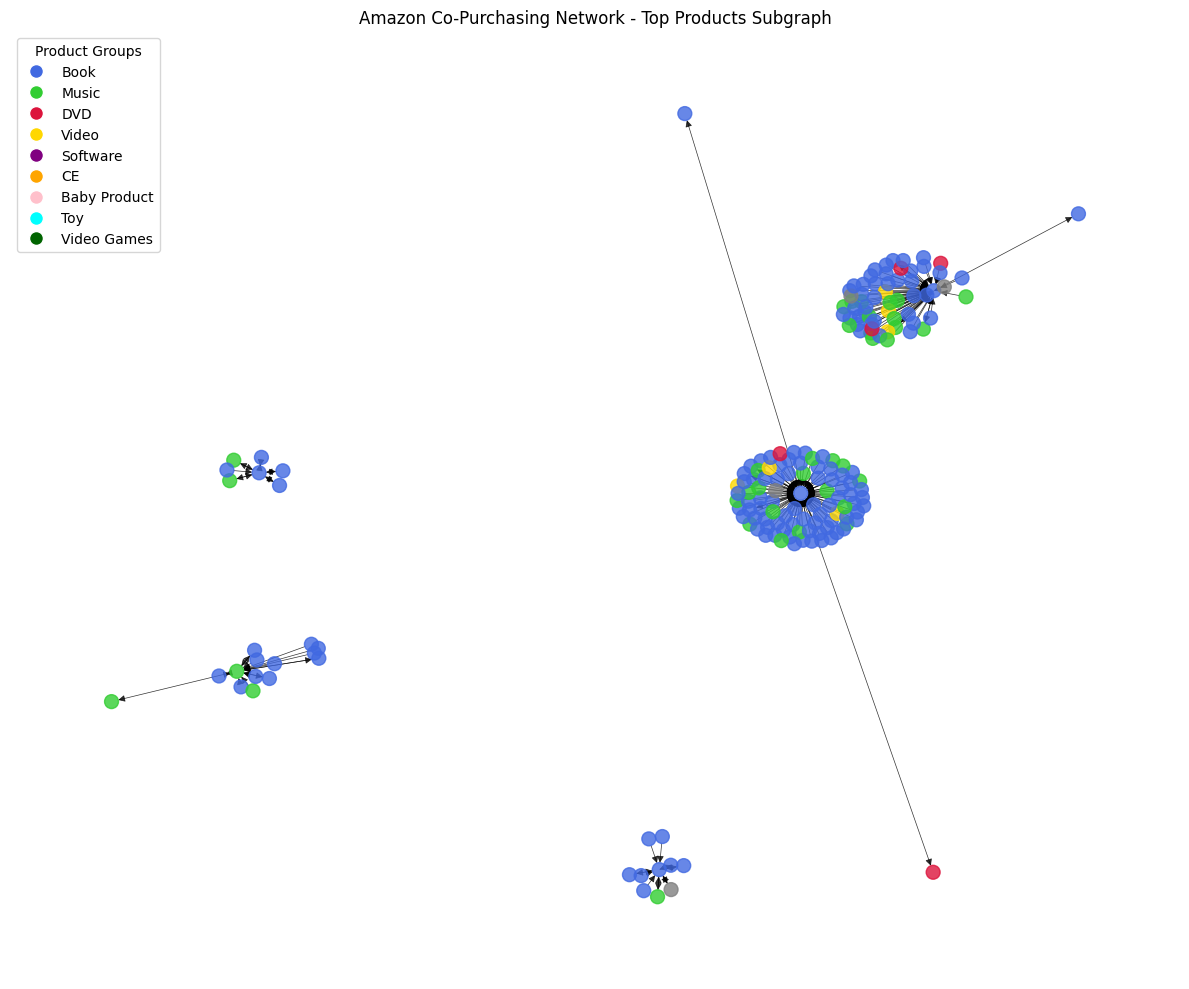

In [4]:
# Get products with highest in-degree (most popular targets)
top_products = df_copurchase['Target'].value_counts().head(30).index.tolist()

# Create subgraph with just these products and their immediate neighbors
subgraph_edges = df_copurchase[
    (df_copurchase['Source'].isin(top_products[:5])) | 
    (df_copurchase['Target'].isin(top_products[:5]))
].head(200)

# Create graph from this subset
G_sub = nx.from_pandas_edgelist(subgraph_edges, 'Source', 'Target', create_using=nx.DiGraph())

# Get group colors
node_groups = {node: df_products[df_products['id'] == node]['group'].values[0] 
               if node in df_products['id'].values else 'Unknown'
               for node in G_sub.nodes()}

# Map groups to colors
group_to_color = {
        'Book': 'royalblue',
        'Music': 'limegreen',
        'DVD': 'crimson',
        'Video': 'gold',
        'Software': 'purple',
        'CE': 'orange',
        'Baby Product': 'pink',
        'Toy': 'cyan',
        'Video Games': 'darkgreen'
    }
node_colors = [group_to_color.get(node_groups.get(node, 'Unknown'), 'gray') for node in G_sub.nodes()]

# Plot
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx(G_sub, pos, 
                 node_color=node_colors,
                 node_size=100, 
                 with_labels=False,
                 alpha=0.8,
                 width=0.5,
                 arrowsize=10)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, 
                             markersize=10, label=group) 
                  for group, color in group_to_color.items()]
plt.legend(handles=legend_elements, title="Product Groups")

plt.title("Amazon Co-Purchasing Network - Top Products Subgraph")
plt.axis('off')
plt.tight_layout()
plt.show()

#### Correlation Matrix antara salesrank, review count, download, rating

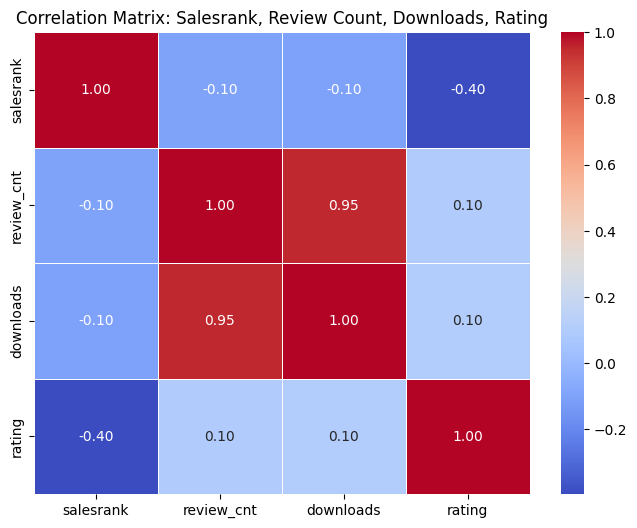

In [5]:
# Memilih hanya kolom yang relevan untuk analisis korelasi
correlation_matrix = df_products[['salesrank', 'review_cnt', 'downloads', 'rating']].corr()

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Salesrank, Review Count, Downloads, Rating")
plt.show()

**Penjelasan**

1. **Salesrank memiliki korelasi negatif dengan review count, downloads, dan rating**, yang berarti produk dengan peringkat penjualan lebih rendah (lebih populer) cenderung memiliki lebih banyak ulasan, unduhan, dan rating yang lebih tinggi
2. **Review count dan downloads memiliki korelasi positif yang kuat**, menunjukkan bahwa produk yang sering diunduh juga sering mendapatkan banyak ulasan
3. **Rating memiliki korelasi lemah dengan metrik lainnya**, menunjukkan bahwa jumlah ulasan atau unduhan tidak selalu berbanding lurus dengan rating yang diberikan pengguna.

#### Jumlah row dalam df_copurchase

In [6]:
len(df_copurchase)

1234870

#### Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)

In [7]:
# Menghitung jumlah kemunculan setiap produk sebagai 'Source' (out-degree)
top_out_degree = df_copurchase['Source'].value_counts()
top_out_degree

Source
131454    5
166501    5
166487    5
166488    5
166489    5
         ..
44578     1
250624    1
82937     1
208301    1
184560    1
Name: count, Length: 257569, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_49512\980213463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_out_degree.index, y=top_out_degree.values, palette="viridis")


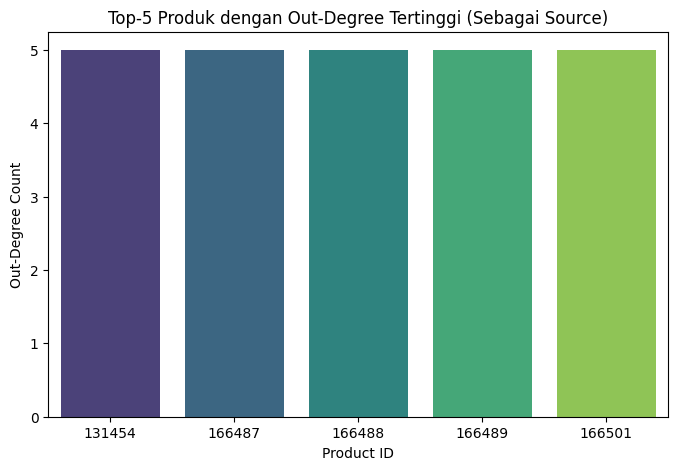

Source
131454    5
166501    5
166487    5
166488    5
166489    5
166490    5
166491    5
166492    5
166493    5
166494    5
Name: count, dtype: int64

In [8]:
# Menghitung jumlah kemunculan setiap produk sebagai 'Source' (out-degree)
top_out_degree = df_copurchase['Source'].value_counts().head(5)

# Visualisasi dengan bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_out_degree.index, y=top_out_degree.values, palette="viridis")
plt.xlabel("Product ID")
plt.ylabel("Out-Degree Count")
plt.title("Top-5 Produk dengan Out-Degree Tertinggi (Sebagai Source)")
plt.show()

top_out_degree = df_copurchase['Source'].value_counts().head(10)
top_out_degree

**Penjelasan**

Grafik di atas menunjukkan Top-5 produk dengan out-degree tertinggi, yaitu **produk yang paling sering muncul sebagai Source dalam hubungan co-purchasing**

Kelima produk teratas memiliki jumlah koneksi (out-degree) sebanyak 5 kali masing-masing, dengan Product IDs :

131454 <br>
166501 <br>
166487 <br>
166488 <br>
166489

#### Top-5 produk yang paling banyak di co-purchase (target) (in-degree)

C:\Users\user\AppData\Local\Temp\ipykernel_49512\3001278293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_in_degree.index, y=top_in_degree.values, palette="viridis")


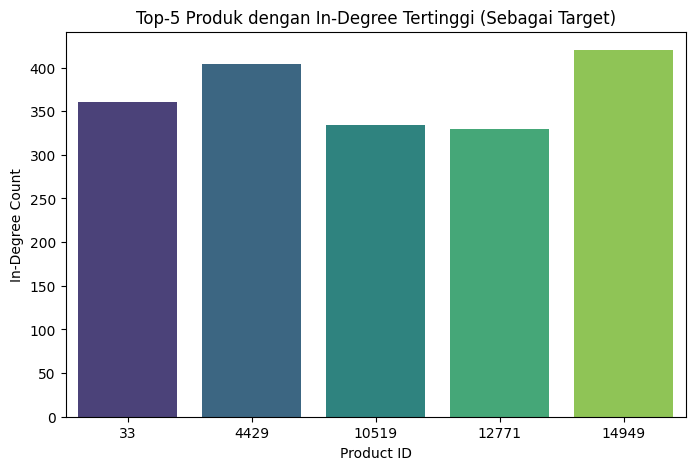

Target
14949    420
4429     404
33       361
10519    334
12771    330
8        293
297      280
481      275
5737     272
9106     227
Name: count, dtype: int64

In [9]:
top_in_degree = df_copurchase['Target'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_in_degree.index, y=top_in_degree.values, palette="viridis")
plt.xlabel("Product ID")
plt.ylabel("In-Degree Count")
plt.title("Top-5 Produk dengan In-Degree Tertinggi (Sebagai Target)")
plt.show()

top_in_degree = df_copurchase['Target'].value_counts().head(10)
top_in_degree

**Penjelasan**

Grafik di atas menunjukkan Top-5 produk dengan in-degree tertinggi, yaitu **produk yang paling sering muncul sebagai Source dalam hubungan co-purchasing**

Kelima produk teratas memiliki jumlah koneksi masuk (in-degree) tertinggi:

- `14949` dengan 420 koneksi.
- `4429` dengan 404 koneksi
- `33` denagn 361 koneksi
- `10519` dengan 334 koneksi.
- `12771` dengan 330 koneksi.

#### Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)

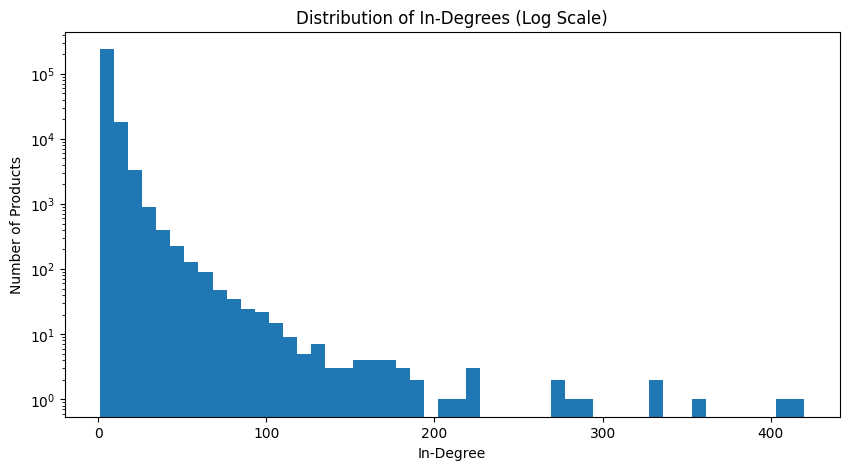

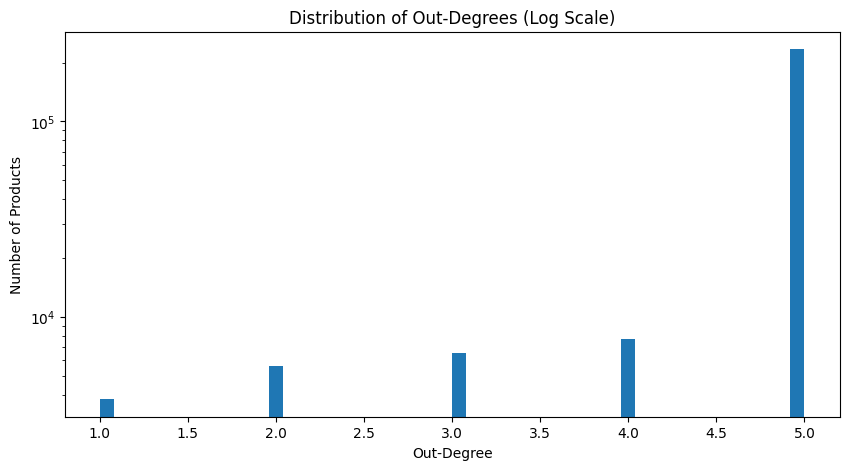

In [10]:
in_degree_counts = df_copurchase['Target'].value_counts()
out_degree_counts = df_copurchase['Source'].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(in_degree_counts.values, bins=50, log=True)
plt.xlabel("In-Degree")
plt.ylabel("Number of Products")
plt.title("Distribution of In-Degrees (Log Scale)")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(out_degree_counts.values, bins=50, log=True)
plt.xlabel("Out-Degree")
plt.ylabel("Number of Products")
plt.title("Distribution of Out-Degrees (Log Scale)")
plt.show()


**Penjelasan**

Grafik tersebut menunjukkan distribusi jumlah *in-degree* dan *out-degree* dari semua produk. Beberapa insight:

- Sebagian besar produk memiliki *in-degree* yang sedikit, yang berarti sebagian besar produk dibeli bersamaan dengan sebagian kecil produk. Ini mungkin bersesuaian untuk barang-barang khusus atau kurang populer yang tidak sering direkomendasikan atau dibeli bersamaan dengan barang-barang lainnya.
- Ada beberapa produk yang memiliki *in-degree* yang tinggi, menggambarkan beberapa produk dibeli bersamaan dengan sesuatu. Ini mungkin bersesuaian dengan produk-produk seperti aksesoris, *add-on* seperti baterai, dan barang borongan seperti buku berseri.
- Setiap produk paling banyak dihubungkan dengan 5 produk lainnya. Ini mungkin suatu batasan yang diterapkan di sistem Amazon.

#### Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)

In [11]:
id_set = set(df_products['id'])
copurchase_source_set = set(df_copurchase['Source'])
copurchase_target_set = set(df_copurchase['Target'])
copurchase_target_and_source_set = copurchase_source_set.union(copurchase_target_set)

len(id_set), len(copurchase_source_set), len(copurchase_target_set), len(copurchase_target_and_source_set)

(259167, 257569, 262108, 262110)

Ternyata, ada banyak produk yang masuk ke co-purchase dataframe tapi tidak ada datanya di products dataframe.

In [12]:
copurchase_target_and_source_set.difference(id_set)

{106502,
 229391,
 204817,
 147475,
 188436,
 32791,
 163866,
 172058,
 188446,
 221214,
 73762,
 98339,
 8229,
 180262,
 221221,
 221224,
 188458,
 253998,
 155695,
 204848,
 65590,
 65592,
 204856,
 172090,
 204857,
 204858,
 204859,
 32830,
 147519,
 155710,
 172095,
 204860,
 204862,
 204864,
 114757,
 114763,
 98380,
 16461,
 114765,
 16463,
 16464,
 196684,
 16466,
 16468,
 16469,
 16471,
 172119,
 204890,
 180317,
 221284,
 254056,
 122985,
 147563,
 73836,
 106605,
 147566,
 90230,
 16507,
 16510,
 172160,
 254080,
 8322,
 172163,
 254089,
 73867,
 188560,
 180373,
 196760,
 49305,
 147609,
 196761,
 163997,
 237726,
 188576,
 57506,
 24739,
 155811,
 24741,
 221353,
 204970,
 82095,
 82096,
 65714,
 237747,
 139450,
 98494,
 147654,
 147659,
 147660,
 98509,
 237778,
 245976,
 106716,
 188636,
 90336,
 24801,
 57570,
 172258,
 82148,
 205028,
 229605,
 155883,
 213228,
 16622,
 254191,
 254196,
 33013,
 214975,
 237818,
 73986,
 49422,
 205071,
 16659,
 172307,
 114968,
 13136

In [13]:
ids_not_in_copurchase = id_set - copurchase_target_and_source_set
ids_not_in_copurchase = list(ids_not_in_copurchase)
ids_not_in_source_set = id_set - copurchase_source_set
ids_not_in_source_set = list(ids_not_in_source_set)
ids_not_in_target_set = id_set - copurchase_target_set
ids_not_in_target_set = list(ids_not_in_target_set)

print(f"Number of products not in copurchase: {df_products['id'].isin(ids_not_in_copurchase).sum()}")
print(f"Number of products not in source set: {df_products['id'].isin(ids_not_in_source_set).sum()}")
print(f"Number of products not in target set: {df_products['id'].isin(ids_not_in_target_set).sum()}")

Number of products not in copurchase: 0
Number of products not in source set: 4498
Number of products not in target set: 2


In [14]:
df_product_not_in_source = df_products[df_products['id'].isin(ids_not_in_source_set)]

df_product_not_in_target = df_products[df_products['id'].isin(ids_not_in_target_set)]

,id,salesrank,review_cnt,downloads,rating
count,4498.000000,4.498000e+03,4498.000000,4498.000000,4498.000000
mean,125751.353268,5.008037e+05,13.276345,13.182748,3.138951
std,81875.753261,5.857637e+05,51.565032,51.410507,2.030436
min,9.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,57594.250000,9.625275e+04,0.000000,0.000000,0.000000
50%,106080.500000,3.029205e+05,2.000000,2.000000,4.000000
75%,210240.250000,6.690218e+05,8.000000,8.000000,5.000000
max,262096.000000,3.523759e+06,1447.000000,1435.000000,5.000000


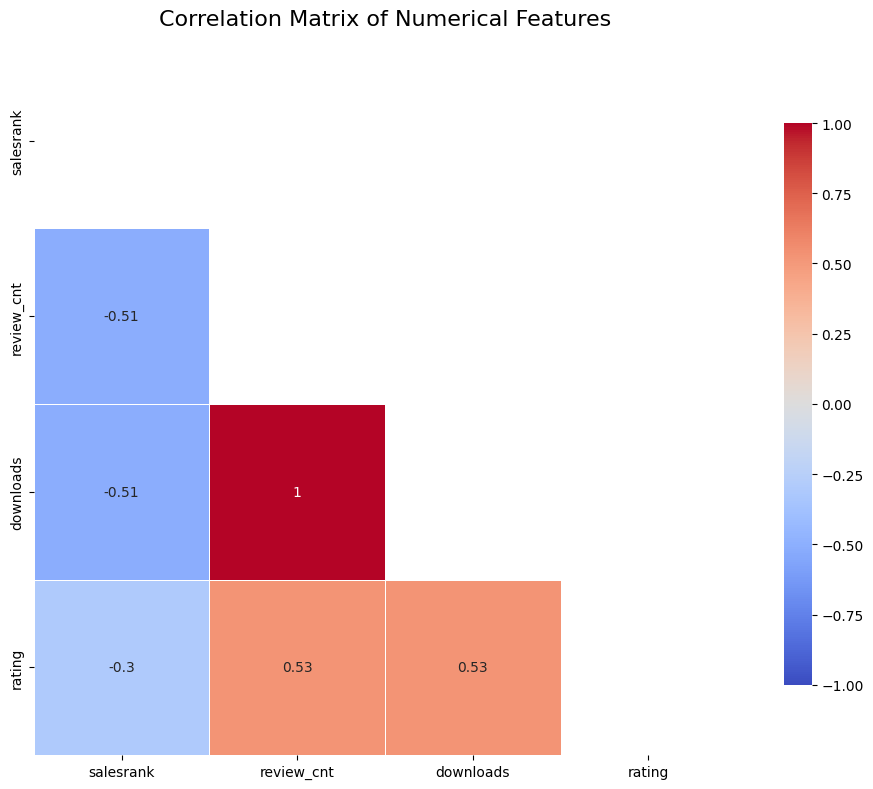

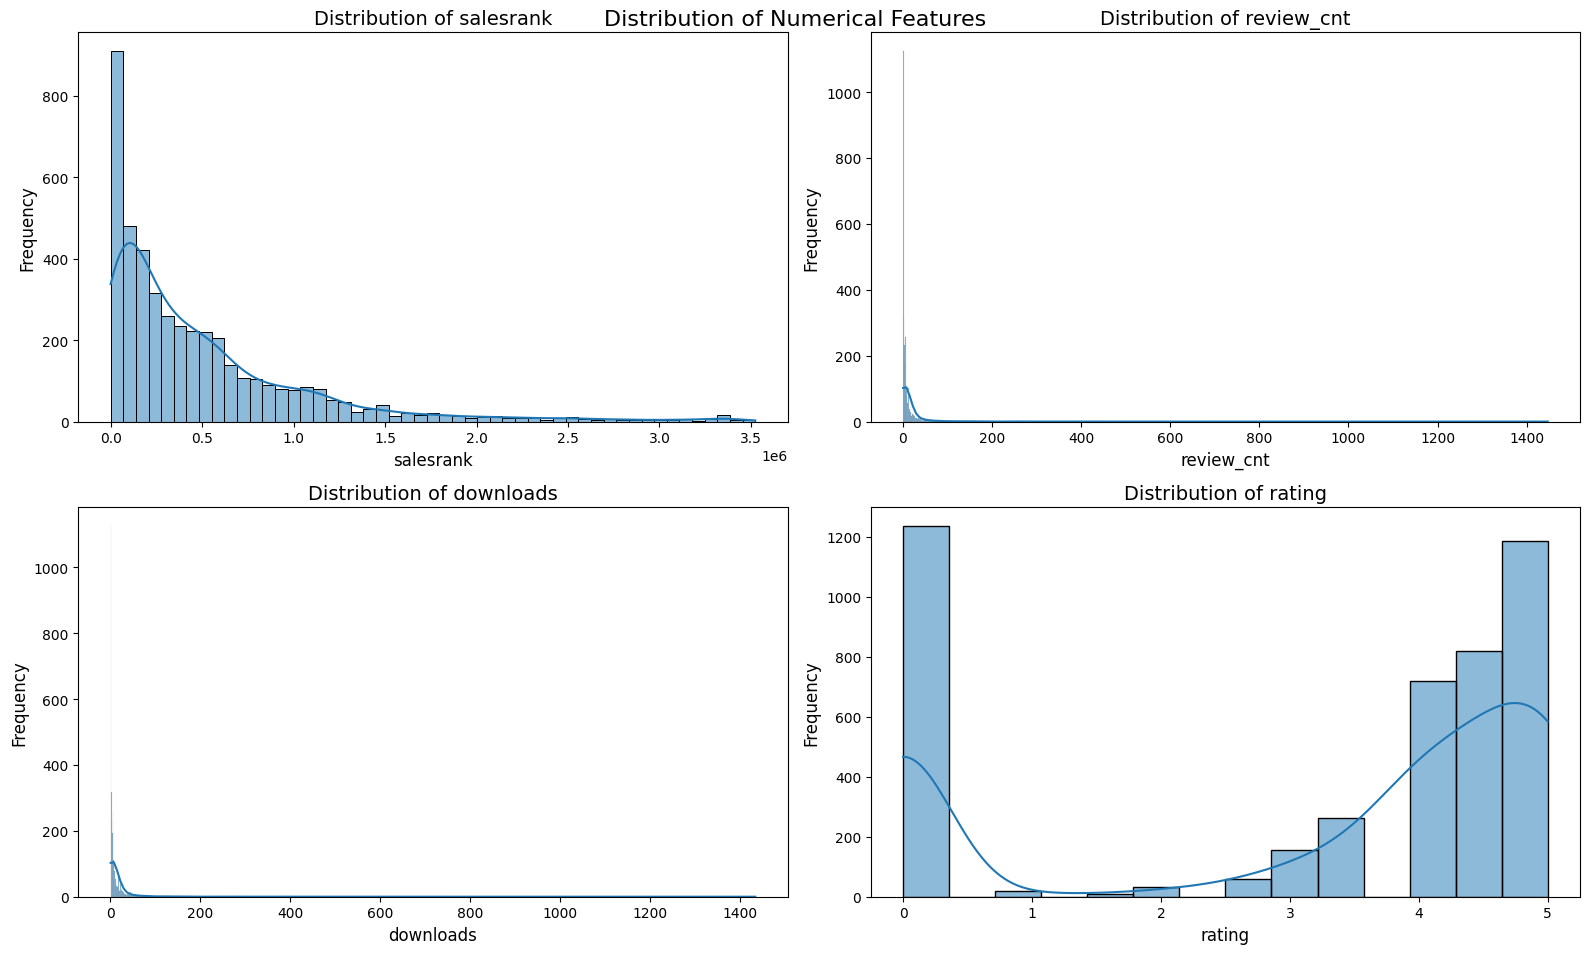

C:\Users\user\AppData\Local\Temp\ipykernel_49512\2808117764.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')


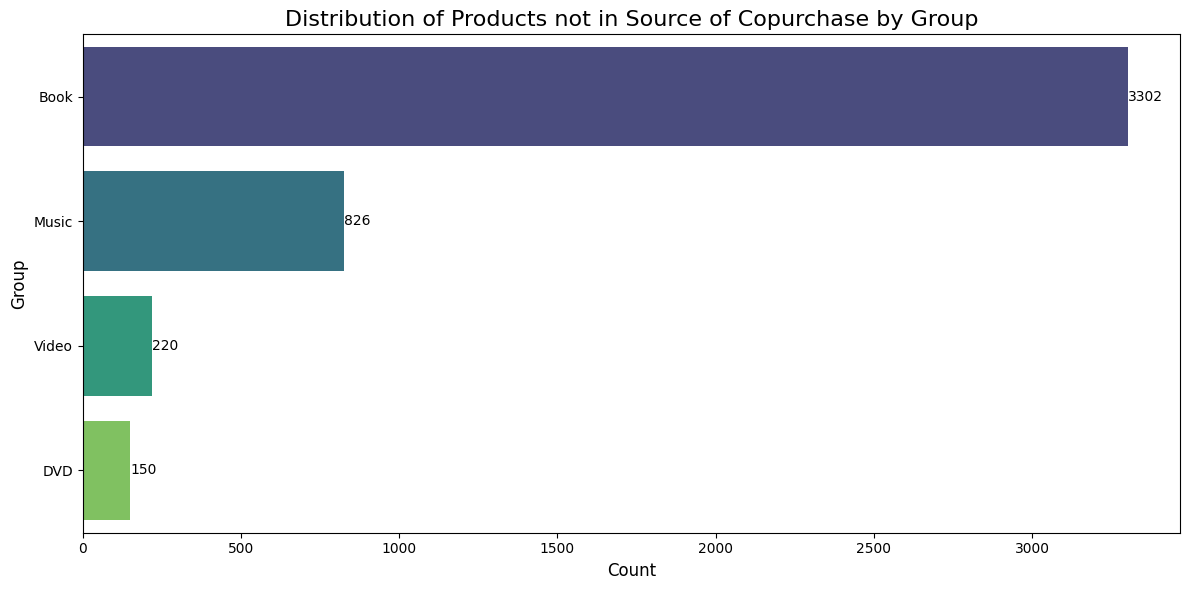

In [15]:
num_cols = ['salesrank', 'review_cnt', 'downloads', 'rating']

display(df_product_not_in_source.describe())

plt.figure(figsize=(10, 8))
corr_matrix = df_product_not_in_source[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
           mask=mask,
           annot=True, 
           cmap='coolwarm', 
           vmin=-1, 
           vmax=1, 
           center=0,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 3. Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=0.95)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Filter out non-positive values for log scale columns (except rating)
    if col != 'rating':
        # Only plot positive values for log scale
        valid_data = df_product_not_in_source[df_product_not_in_source[col] > 0][col]
        sns.histplot(valid_data, kde=True, ax=axes[i])
        # axes[i].set_yscale('log') 
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    else:
        # For rating, keep linear scale
        sns.histplot(df_product_not_in_source[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    
    axes[i].set_xlabel(col, fontsize=12)
    

plt.tight_layout()
plt.show()

# 4. Group value counts visualization
plt.figure(figsize=(12, 6))
group_counts = df_product_not_in_source['group'].value_counts()

ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')

for i, v in enumerate(group_counts.values):
    ax.text(v + 0.1, i, str(v), va='center')
    
plt.title('Distribution of Products not in Source of Copurchase by Group', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Group', fontsize=12)
plt.tight_layout()
plt.show()


#### Jumlah Produk yang Tidak Berpartisipasi
- **0 produk** yang tidak muncul sama sekali dalam co-purchase (semua produk muncul minimal sebagai source atau target)
- **4.498 produk** tidak pernah menjadi "Source" dalam hubungan co-purchase
- **Hanya 2 produk** yang tidak pernah menjadi "Target" dalam hubungan co-purchase

#### Karakteristik Produk yang Tidak Pernah Menjadi Source
1. **Distribusi Group**: 
   - Didominasi oleh produk kategori "Book"
   - Hal ini menunjukkan bahwa buku-buku tertentu jarang menjadi titik awal rekomendasi co-purchase

2. **Peringkat Penjualan (Salesrank)**:
   - Distribusi salesrank sangat skewed dengan beberapa produk memiliki peringkat penjualan yang sangat tinggi
   - Produk-produk ini cenderung memiliki salesrank yang lebih buruk (angka lebih tinggi) dibandingkan rata-rata produk
   - Ini mengindikasikan produk-produk yang tidak populer jarang menjadi pemicu pembelian produk lain

3. **Jumlah Review dan Downloads**:
   - Sebagian besar memiliki jumlah review dan downloads yang sangat rendah
   - Terdapat korelasi positif antara review_cnt dan downloads
   - Produk dengan engagement rendah (review dan downloads sedikit) cenderung tidak mendorong co-purchase

4. **Rating**:
   - Distribusi rating menunjukkan polarisasi, banyak produk dengan rating sangat rendah atau sangat tinggi
   - Banyak produk tanpa rating (rating = 0)

Analisis ini menunjukkan bahwa popularitas dan engagement produk sangat mempengaruhi kemampuannya untuk menjadi trigger dalam pembelian produk lain.

#### Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara salesrank, review count, download, rating, in-degree, out-degree

In [16]:
out_degree_series = df_copurchase['Source'].value_counts()
out_degree_series.index.name = 'id'

out_degree_series.head()

id
131454    5
166501    5
166487    5
166488    5
166489    5
Name: count, dtype: int64

In [17]:
in_degree_series = df_copurchase['Target'].value_counts()
in_degree_series.index.name = 'id'

in_degree_series.head()

id
14949    420
4429     404
33       361
10519    334
12771    330
Name: count, dtype: int64

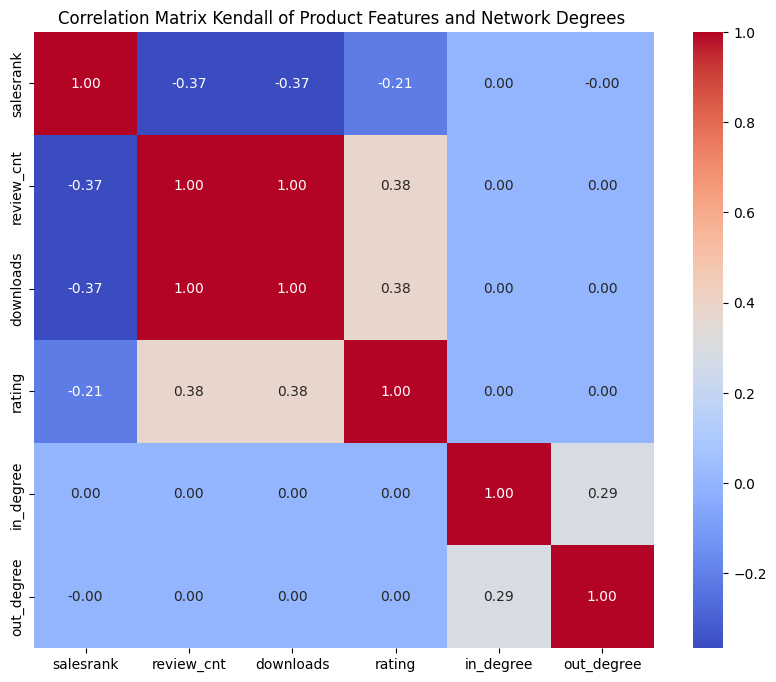

In [18]:
df_products['in_degree'] = df_products['id'].map(in_degree_series).fillna(0).astype(int)


df_products['out_degree'] = df_products['id'].map(out_degree_series).fillna(0).astype(int)

df_products_kendall = df_products.copy()
correlation_matrix_kendall = df_products_kendall[['salesrank', 'review_cnt', 'downloads', 'rating', 'in_degree', 'out_degree']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Kendall of Product Features and Network Degrees ')
plt.show()

Dari hasil yang didapatkan dengan menggunakan metode Kendall terlihat bahwa ada:
- Hubungan yang sangat kuat (bernilai +1) antara review_cnt downloads. 
- Salesrank berkorelasi moderat (bernilai -0.37) dengan review_cnt, downloads dan berkorelasi lemah (bernilai -0.21) dengan rating ini menandakan bahwa salesrank memiliki jumlah review, downloads yang banyak tetapi mempunyai rating yang menegah.
- Rating berkorelasi moderat (bernilai 0.38) dengan review_cnt, downloads menandakan bahwa rating memiliki jumlah review, downloads yang banyak
- Tidak ada hubungan antar in_degree dan out_degree dengan salesrank, jumlah review, atau rating ini menandakan bahwa kedua atribut tersebut tidak terlalu berkaitan langsung dengan salesrank, jumlah review, atau rating pada produk.

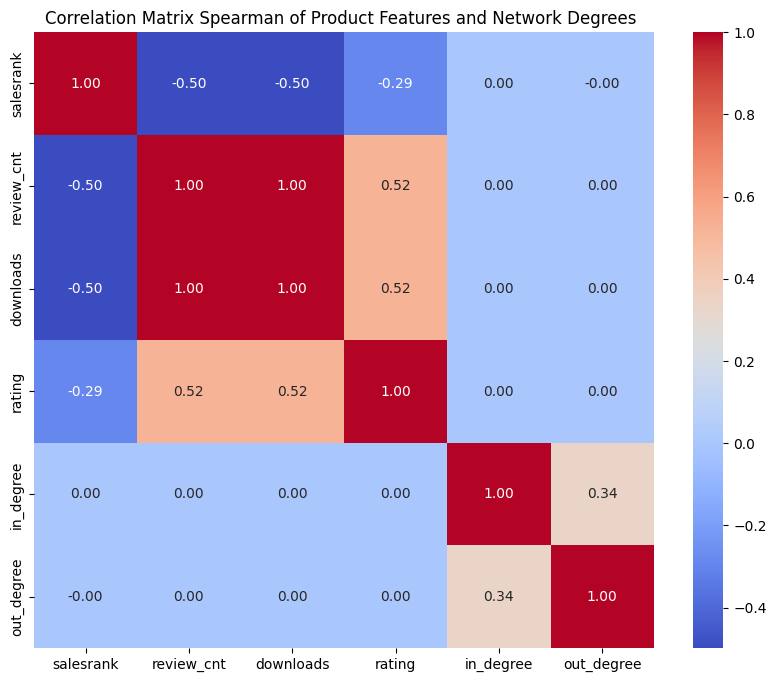

In [19]:
df_products_spearman = df_products.copy()

correlation_matrix_spearman= df_products_spearman[['salesrank', 'review_cnt', 'downloads', 'rating', 'in_degree', 'out_degree']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Spearman of Product Features and Network Degrees ')
plt.show()

Dari hasil yang didapatkan dengan menggunakan metode Spearman terlihat bahwa ada:
- Masih mempertahankan hubungan yang sangat kuat (bernilai +1) antara review_cnt downloads. 
- Korelasi salesrank meningkat dibandingkan dengan metode Kendall dan mendekati kategori kuat (bernilai -0.50) dengan review_cnt, downloads dan berkorelasi lemah (bernilai -0.29) dengan rating ini menandakan bahwa salesrank memiliki jumlah review, downloads yang banyak tetapi mempunyai rating yang menegah.
- Korelasi rating meningkat dibandingkan dengan metode Kendall dan berkorelasi kuat (bernilai 0.52) dengan review_cnt, downloads menandakan bahwa rating memiliki jumlah review, downloads yang banyak.
- Tetap Tidak ada hubungan antar in_degree dan out_degree dengan salesrank, jumlah review, atau rating ini menandakan bahwa kedua atribut tersebut tidak terlalu berkaitan langsung dengan salesrank, jumlah review, atau rating pada produk.

#### Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group (serta distribusinnya).

In [20]:
df_products_no_id = df_products.drop(columns=['id'])
df_products_no_id.describe()

,salesrank,review_cnt,downloads,rating,in_degree,out_degree
count,2.591670e+05,259167.000000,259167.000000,259167.000000,259167.000000,259167.000000
mean,4.955061e+05,14.000895,13.750589,3.158454,4.711290,4.711287
std,5.750585e+05,72.878967,69.013924,2.019447,5.708299,0.951783
min,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.191100e+04,0.000000,0.000000,0.000000,2.000000,5.000000
50%,3.031550e+05,2.000000,2.000000,4.000000,3.000000,5.000000
75%,6.778710e+05,8.000000,7.000000,5.000000,6.000000,5.000000
max,3.793303e+06,5545.000000,4995.000000,5.000000,420.000000,5.000000


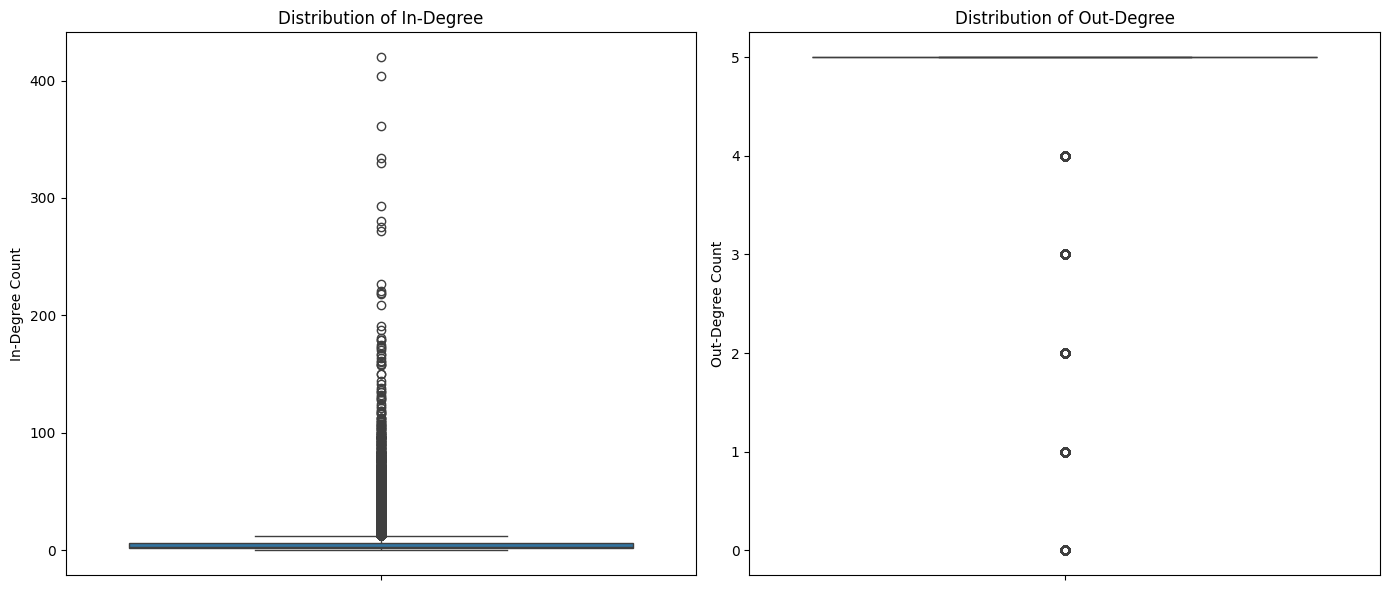

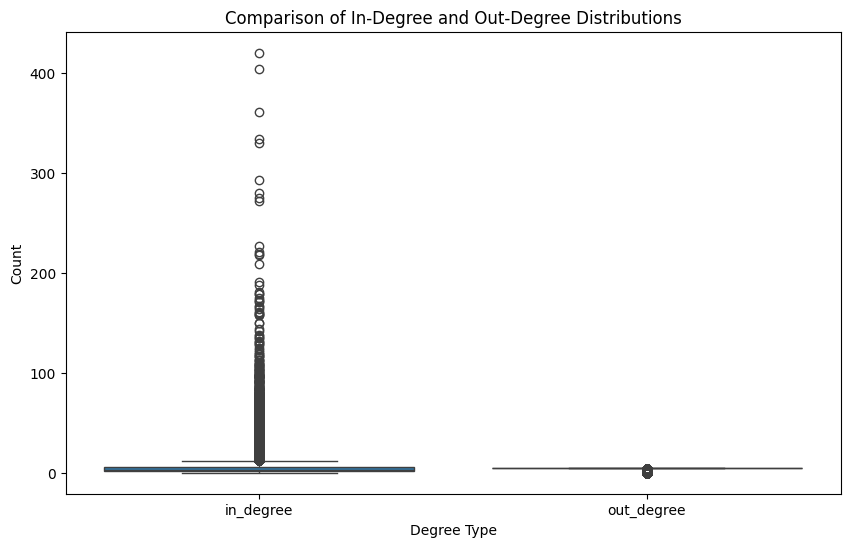

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Individual boxplots with better visibility
sns.boxplot(y='in_degree', data=df_products_no_id, ax=axes[0])
axes[0].set_title('Distribution of In-Degree')
axes[0].set_ylabel('In-Degree Count')

sns.boxplot(y='out_degree', data=df_products_no_id, ax=axes[1])
axes[1].set_title('Distribution of Out-Degree')
axes[1].set_ylabel('Out-Degree Count')

plt.tight_layout()
plt.show()

# Create a long-format DataFrame for side-by-side comparison
df_long = pd.melt(df_products_no_id[['in_degree', 'out_degree']], 
                  var_name='Degree Type', 
                  value_name='Count')

# Side-by-side boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree Type', y='Count', data=df_long)
plt.title('Comparison of In-Degree and Out-Degree Distributions')
plt.ylabel('Count')
plt.show()

Dapat dilihat, distribusi out degree terfokuskan antara 1 - 5 dan lebih padat di sekitar 5. Sementara itu, in degree memiliki banyak sekali outliers, dan distribusinya jauh lebih skewed dibandingkan out degree.

Kebanyakan node memiliki in degree sedikit namun, ada beberapa node yang memiliki in degree sangat tinggi. Hal ini menunjukkan bahwa ada beberapa produk yang sangat populer dan sering dibeli bersamaan dengan produk lain, sementara sebagian besar produk lainnya tidak memiliki hubungan co-purchasing yang signifikan.

#### Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)

In [22]:
# Menggabungkan DataFrame untuk mendapatkan atribut group untuk Source dan Target
df_merged = pd.merge(df_copurchase, df_products[['id', 'group']],
                     left_on='Source', right_on='id', how='left')
df_merged.rename(columns={'group': 'source_group'}, inplace=True)
df_merged.drop('id', axis=1, inplace=True)

# Gabungkan untuk mendapatkan group produk target
df_merged = pd.merge(df_merged, df_products[['id', 'group']],
                     left_on='Target', right_on='id', how='left')
df_merged.rename(columns={'group': 'target_group'}, inplace=True)
df_merged.drop('id', axis=1, inplace=True)

# Tambahkan kolom yang menandai apakah koneksi berada dalam group yang sama
df_merged['same_group'] = df_merged['source_group'] == df_merged['target_group']

# Menghitung out-degree untuk masing-masing source group
out_degree = df_merged.groupby('source_group').apply(lambda x: pd.Series({
    'total_out': len(x),
    'out_in_group': x['same_group'].sum(),
    'out_out_group': (~x['same_group']).sum()
})).reset_index().rename(columns={'source_group': 'group'})

# Menghitung in-degree untuk masing-masing target group
in_degree = df_merged.groupby('target_group').apply(lambda x: pd.Series({
    'total_in': len(x),
    'in_in_group': x['same_group'].sum(),
    'in_out_group': (~x['same_group']).sum()
})).reset_index().rename(columns={'target_group': 'group'})

# Menggabungkan hasil perhitungan out-degree dan in-degree
connectivity = pd.merge(out_degree, in_degree, on='group', how='outer')

connectivity


C:\Users\user\AppData\Local\Temp\ipykernel_49512\165260701.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out_degree = df_merged.groupby('source_group').apply(lambda x: pd.Series({
C:\Users\user\AppData\Local\Temp\ipykernel_49512\165260701.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  in_degree = df_merged.groupby('target_group').apply(lambda x: pd.Series({


,group,total_out,out_in_group,out_out_group,total_in,in_in_group,in_out_group
0,Baby Product,5,0,5,3,0,3
1,Book,885615,637893,247722,884954,637893,247061
2,CE,12,0,12,5,0,5
3,DVD,45077,3043,42034,44764,3043,41721
4,Music,230758,45806,184952,231895,45806,186089
5,Software,10,0,10,7,0,7
6,Toy,11,0,11,20,0,20
7,Video,59517,3372,56145,59360,3372,55988
8,Video Games,5,0,5,3,0,3


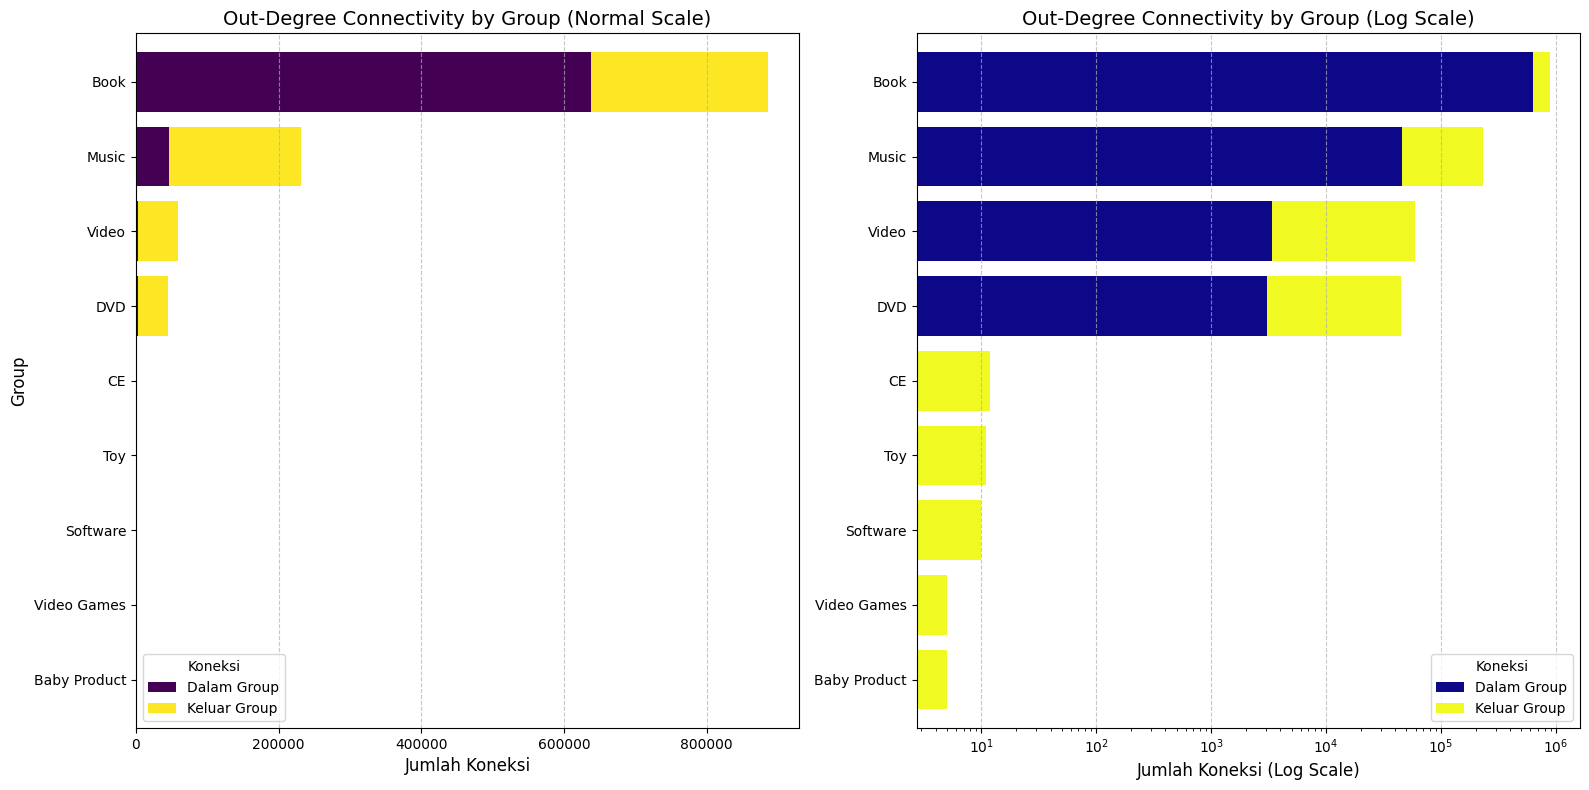

In [23]:
# Urutkan data berdasarkan total_out secara menurun
connectivity_sorted = connectivity.sort_values(by='total_out', ascending=True)

# Buat DataFrame untuk plot menggunakan out_in_group dan out_out_group
plot_data = connectivity_sorted[['group', 'out_in_group', 'out_out_group']].set_index('group')

# Buat figure dengan 2 subplot: normal scale dan log scale
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot dengan skala normal
plot_data.plot(kind='barh', stacked=True, colormap='viridis', width=0.8, ax=ax[0])
ax[0].set_title("Out-Degree Connectivity by Group (Normal Scale)", fontsize=14)
ax[0].set_xlabel("Jumlah Koneksi", fontsize=12)
ax[0].set_ylabel("Group", fontsize=12)
ax[0].legend(title="Koneksi", labels=["Dalam Group", "Keluar Group"])
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot dengan skala log
plot_data.plot(kind='barh', stacked=True, colormap='plasma', width=0.8, ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_title("Out-Degree Connectivity by Group (Log Scale)", fontsize=14)
ax[1].set_xlabel("Jumlah Koneksi (Log Scale)", fontsize=12)
ax[1].set_ylabel("") 
ax[1].legend(title="Koneksi", labels=["Dalam Group", "Keluar Group"])
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Berdasarkan hasil EDA:

- Dominasi Kategori Book: Kategori Book menunjukkan jumlah koneksi yang sangat tinggi, dengan proporsi koneksi internal yang signifikan. Hal ini mengindikasikan bahwa pelanggan yang membeli buku cenderung membeli buku lain.

- Pembelian Lintas Kategori: Untuk banyak kategori lain (seperti DVD, Music, dan Video), mayoritas koneksi terjadi lintas kategori. Ini menunjukkan adanya kecenderungan pembelian produk yang tidak terbatas pada satu kategori saja, melainkan melibatkan berbagai kategori produk.

- Konektivitas Rendah di Beberapa Kategori: Kategori seperti Baby Product, CE, Software, Toy, dan Video Games memiliki konektivitas yang relatif rendah, dengan hampir seluruh koneksi terjadi lintas kategori. Hal ini bisa mengindikasikan baik keterbatasan data maupun pola pembelian yang berbeda di kategori tersebut.

Secara keseluruhan, pola co-purchase di jaringan produk ini memperlihatkan bahwa banyak pembelian internal bersama di kategori Book, tapi terdapat banyak pembelian juga yang terjadi di lintas kategori (Book, Music, Video, DVD). Hal ini mencerminkan perilaku pembelian yang beragam di antara pelanggan.

#### Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan in-degree dari group B, C, D, dst. ke group A) 

In [24]:
# Buat pivot table untuk menghitung hubungan antar group
out_degree_matrix = df_merged.pivot_table(index='source_group',
                                          columns='target_group',
                                          values='Source',
                                          aggfunc='count',
                                          fill_value=0)

out_degree_matrix

target_group,Baby Product,Book,CE,DVD,Music,Software,Toy,Video,Video Games
source_group,,,,,,,,,
Baby Product,0,4,0,1,0,0,0,0,0
Book,2,637893,3,31007,164433,5,13,42241,3
CE,0,7,0,1,4,0,0,0,0
DVD,1,31269,0,3043,8078,0,1,2193,0
Music,0,163471,2,8063,45806,0,4,10905,0
Software,0,7,0,0,2,0,0,1,0
Toy,0,9,0,0,1,0,0,1,0
Video,0,42329,0,2146,11007,2,2,3372,0
Video Games,0,5,0,0,0,0,0,0,0


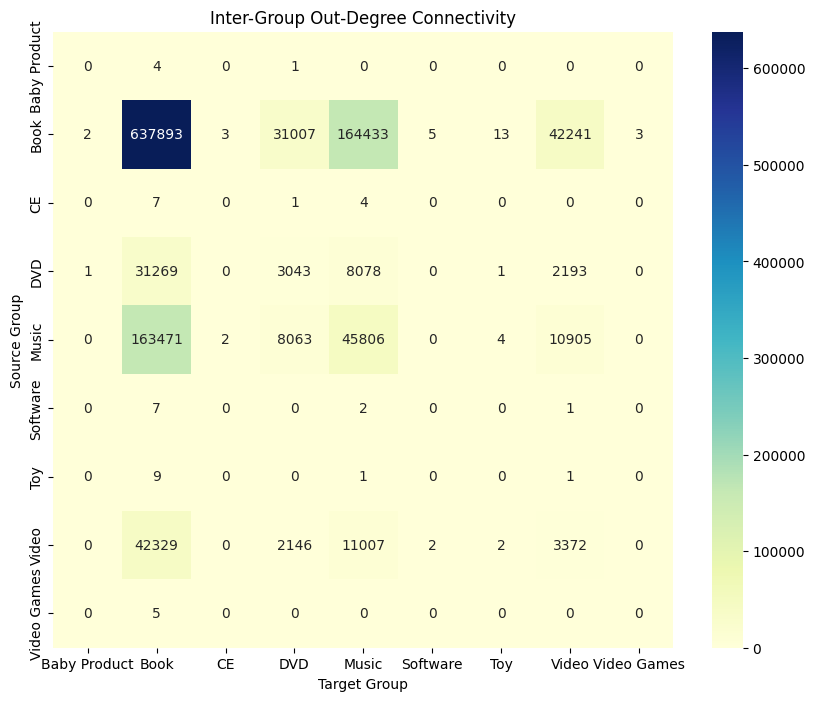

In [25]:
# Visualisasikan menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(out_degree_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Inter-Group Out-Degree Connectivity")
plt.xlabel("Target Group")
plt.ylabel("Source Group")
plt.show()

Berdasarkan hasil matriks konektivitas antar grup, dapat disimpulkan bahwa:

- Pembelian bersama dalam kategori Book sangat banyak dilakukan
- Pembelian produk kategori DVD, Music, dan Video biasa dibarengi dengan pembelian produk kategori Book, DVD, Music, atau Video, begitu juga sebaliknya
- Pembelian bersama produk kategori Baby Product, CE, Software, Toy, Video Games hampir selalu dibareng pembelian produk kategori Book  

# 3. Data Preparation

In [26]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


In [27]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


#### Check Duplicate value for products.csv

In [28]:
print("Total data duplikat adalah: " + str(df_products.duplicated().sum()) + " Data")

Total data duplikat adalah: 0 Data


#### Check Missing value for products.csv

In [29]:
df_products.isnull().sum()

id            0
title         0
group         0
salesrank     0
review_cnt    0
downloads     0
rating        0
dtype: int64

#### Check Missing value for copurchase.csv

In [30]:
df_copurchase.isnull().sum()

Source    0
Target    0
dtype: int64

#### Remove Copurchase that isn't in products.csv

In [31]:
set_source = set(df_copurchase['Source'])
set_target = set(df_copurchase['Target'])
set_products = set(df_products['id'])

target_not_in_products = set_target - set_products
source_not_in_products = set_source - set_products

print("Jumlah produk yang tidak ada di dalam data products.csv adalah: " + str(len(target_not_in_products) + len(source_not_in_products)) + " Data")

df_copurchase_filtered = df_copurchase[~df_copurchase['Source'].isin(source_not_in_products)]
df_copurchase_filtered = df_copurchase_filtered[~df_copurchase_filtered['Target'].isin(target_not_in_products)]

print("Jumlah data copurchase setelah di filter adalah: " + str(len(df_copurchase_filtered)) + " Data dari " + str(len(df_copurchase)) + " Data")

Jumlah produk yang tidak ada di dalam data products.csv adalah: 5843 Data
Jumlah data copurchase setelah di filter adalah: 1207337 Data dari 1234870 Data


#### Handle Self Loop and Multi Edge

In [32]:
df_copurchase_filtered = df_copurchase_filtered[df_copurchase_filtered['Source'] != df_copurchase_filtered['Target']]

duplicate_edges_sum = df_copurchase_filtered.duplicated(subset=['Source', 'Target']).sum()
duplicate_edges_sum

0

#### Clean Salesrank Value

In [33]:
print(df_products[df_products['salesrank'] < 1]['salesrank'].value_counts())

df_products = df_products.assign(
    salesrank=lambda df: df['salesrank'].apply(lambda x: np.nan if x < 1 else x)
)

median_ranks = df_products.groupby('group')['salesrank'].transform('median')
df_products = df_products.assign(
    salesrank=lambda df: df['salesrank'].fillna(median_ranks)
)

print("=============== After Cleaning ===============")
df_products[df_products['salesrank'] < 1]['salesrank'].value_counts()

salesrank
-1.0    226
Name: count, dtype: int64
=============== After Cleaning ===============


Series([], Name: count, dtype: int64)

#### Export preprocessed data

In [68]:
df_products.to_csv('products_cleaned.csv', index=False)
df_copurchase_filtered.to_csv('copurchase_cleaned.csv', index=False)

### Create and Export Graph

In [2]:
df_products = pd.read_csv('products_cleaned.csv')
df_copurchase = pd.read_csv('copurchase_cleaned.csv')

In [ ]:
in_degree_counts = df_copurchase['Target'].value_counts()

out_degree_counts = df_copurchase['Source'].value_counts()

df_products['in_degree'] = df_products['id'].map(in_degree_counts).fillna(0).astype(int)
df_products['out_degree'] = df_products['id'].map(out_degree_counts).fillna(0).astype(int)

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating,in_degree,out_degree
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0,0,4
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5,1,4
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0,0,5
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0,24,5
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0,53,5


In [5]:
print(f"{df_products.shape} {df_copurchase.shape}")

(259167, 9) (1207337, 2)


In [14]:
df_products.to_csv('products_cleaned_engineered.csv', index=False)

In [6]:
# Create a directed graph
G = nx.from_pandas_edgelist(df_copurchase, 'Source', 'Target', create_using=nx.DiGraph())

# Add node attributes in bulk afterward
node_attrs = df_products.set_index('id').to_dict('index')
nx.set_node_attributes(G, node_attrs)

# Print basic graph info
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph has 259102 nodes and 1207337 edges


#### Using Pickle

In [12]:
import pickle

pickle_file_path = 'amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'wb') as f:
    pickle.dump(G, f)

In [13]:
with open(pickle_file_path, 'rb') as f:
    loaded_graph = pickle.load(f)

#### Using Graphml

In [9]:
graphml_file_path = 'amazon_copurchase_graph.graphml'

nx.write_graphml(G, graphml_file_path)

In [10]:
loaded_graph = nx.read_graphml(graphml_file_path)